In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

### Data Understanding and Preparation

In [2]:
# Load Dataset
telecom_dataset = pd.read_csv("train.csv")

In [3]:
# Find total number of rows and columns
telecom_dataset.shape

(69999, 172)

Observation : There are 69999 rows and 172 columns

In [4]:
# Preview Dataset
telecom_dataset.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
# Find and print duplicates
print("The total number of Duplicate Rows are" , telecom_dataset.duplicated().sum())

The total number of Duplicate Rows are 0


### Find numerical and categorical columns

In [6]:
category_columns = telecom_dataset.select_dtypes(include=['object' ,'O']).columns.tolist()
print(category_columns)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [7]:
numeric_columns = telecom_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_columns)

['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',

### Handling Null Values

In [8]:
# Find the percentage of null values present in the dataset
round(100*telecom_dataset.isnull().mean(), 2).sort_values(ascending=False)

arpu_3g_6                   74.9
count_rech_2g_6             74.9
night_pck_user_6            74.9
arpu_2g_6                   74.9
date_of_last_rech_data_6    74.9
                            ... 
last_day_rch_amt_8           0.0
vol_2g_mb_6                  0.0
vol_2g_mb_7                  0.0
vol_2g_mb_8                  0.0
churn_probability            0.0
Length: 172, dtype: float64

In [9]:
# Checking information about data.
print(telecom_dataset.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(telecom_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.9,5506
count_rech_2g_6,float64,17568,52431,74.9,30
night_pck_user_6,float64,17568,52431,74.9,2
arpu_2g_6,float64,17568,52431,74.9,5389
date_of_last_rech_data_6,object,17568,52431,74.9,30
...,...,...,...,...,...
last_day_rch_amt_8,int64,69999,0,0.0,191
vol_2g_mb_6,float64,69999,0,0.0,11494
vol_2g_mb_7,float64,69999,0,0.0,11443
vol_2g_mb_8,float64,69999,0,0.0,11359


In [10]:
#Checking for missing values.
missing_values = metadata_matrix(telecom_dataset)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
arpu_3g_6,float64,74.9
night_pck_user_6,float64,74.9
arpu_2g_6,float64,74.9
date_of_last_rech_data_6,object,74.9
total_rech_data_6,float64,74.9
...,...,...
monthly_3g_6,int64,0.0
id,int64,0.0
vol_3g_mb_7,float64,0.0
total_rech_num_7,int64,0.0


In [11]:
#finding missing values more than 70%
metadata = metadata_matrix(telecom_dataset)
condition = metadata['Null_Percentage'] > 70
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


In [12]:
# remove high missing values from original dataframe
high_missing_value_columns = high_missing_values.index
high_missing_value_columns
telecom_dataset.drop(columns=high_missing_value_columns, inplace=True)

In [13]:
telecom_dataset.shape

(69999, 142)

Filtering High Value Customers  based on recharge amount

In [14]:
telecom_dataset['Average_recharge_amt'] = (telecom_dataset['total_rech_amt_6'] + telecom_dataset['total_rech_amt_7'] + telecom_dataset['total_rech_amt_8'])/3

In [15]:
telecom_dataset.shape

(69999, 143)

In [16]:
# Take high value customers whose average recharge amount is greater than 70th percentile
telecom_dataset=telecom_dataset[(telecom_dataset['Average_recharge_amt']>= telecom_dataset['Average_recharge_amt'].quantile(0.7))]

In [17]:
telecom_dataset.shape

(21003, 143)

In [24]:
list(telecom_dataset.columns)

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 

### Feature Engineering and Data Visualization

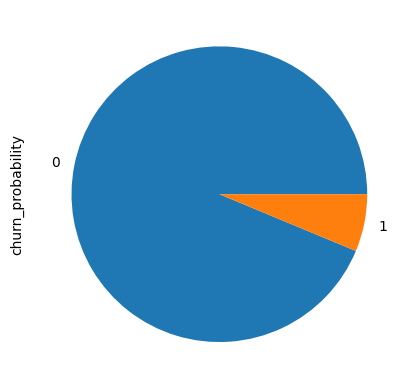

In [18]:
telecom_dataset['churn_probability'].value_counts().plot.pie()
plt.show()

In [19]:
churn_per = ( len(telecom_dataset[telecom_dataset.churn_probability==1])/len(telecom_dataset) ) * 100
print("Percentage of Churn Customer =",churn_per)
non_churn_per = ( len(telecom_dataset[telecom_dataset.churn_probability==0])/len(telecom_dataset) ) * 100
print("Percentage of Non-churn Customer =",non_churn_per)

Percentage of Churn Customer = 6.275294005618245
Percentage of Non-churn Customer = 93.72470599438175


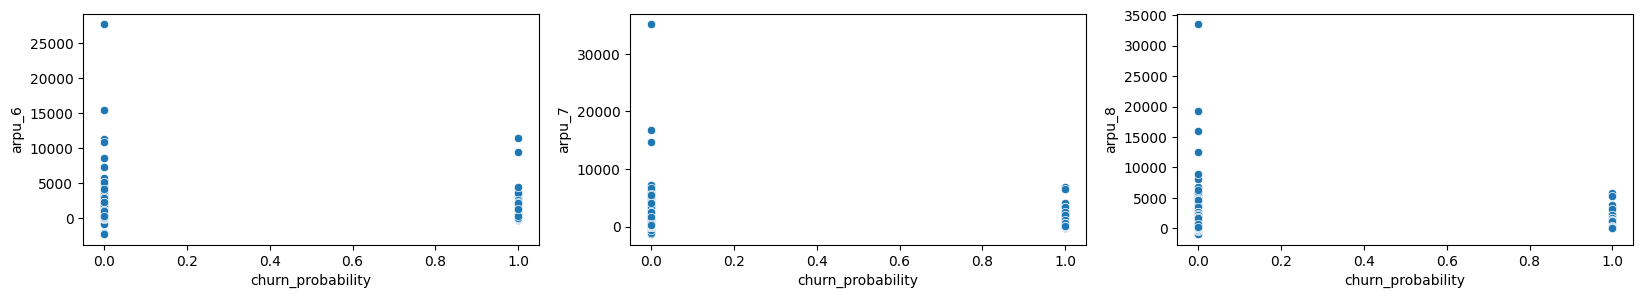

In [20]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="arpu_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="arpu_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="arpu_8")
plt.show()

##### Customers who have more average revenue per user in month of august are high value customer

In [25]:
#telecom_dataset['total_data_rech_amt_6'] = telecom_dataset['total_rech_data_6'] * telecom_dataset['av_rech_amt_data_6']
#telecom_dataset['total_data_rech_amt_7'] = telecom_dataset['total_rech_data_7'] * telecom_dataset['av_rech_amt_data_7']
#telecom_dataset['total_data_rech_amt_8'] = telecom_dataset['total_rech_data_8'] * telecom_dataset['av_rech_amt_data_8']
#telecom_dataset['total_rech_6'] = telecom_dataset['total_data_rech_amt_6'] + telecom_dataset['total_rech_amt_6']
#telecom_dataset['total_rech_7'] = telecom_dataset['total_data_rech_amt_7'] + telecom_dataset['total_rech_amt_7']
#telecom_dataset['total_rech_8'] = telecom_dataset['total_data_rech_amt_8'] + telecom_dataset['total_rech_amt_8']
#telecom_dataset.head(10)

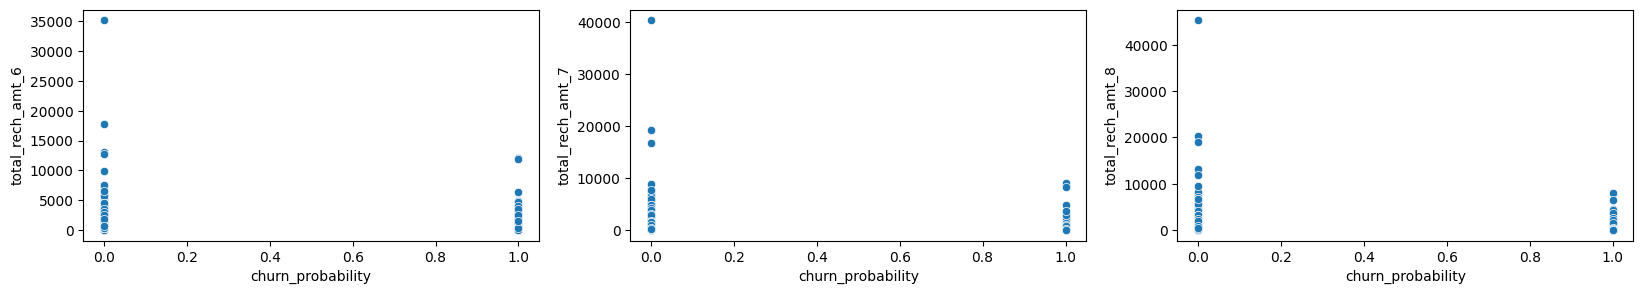

In [26]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="total_rech_amt_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="total_rech_amt_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="total_rech_amt_8")
plt.show()

##### It is observed that customers with good recharge amount in August are high value customer

In [27]:
## Add all roaming incoming and outgoing columns and add a new column 
telecom_dataset['roam_any_6'] = telecom_dataset['roam_ic_mou_6'] + telecom_dataset['roam_og_mou_6'] 
telecom_dataset['roam_any_7'] = telecom_dataset['roam_ic_mou_7'] + telecom_dataset['roam_og_mou_7'] 
telecom_dataset['roam_any_8'] = telecom_dataset['roam_ic_mou_8'] + telecom_dataset['roam_og_mou_8'] 

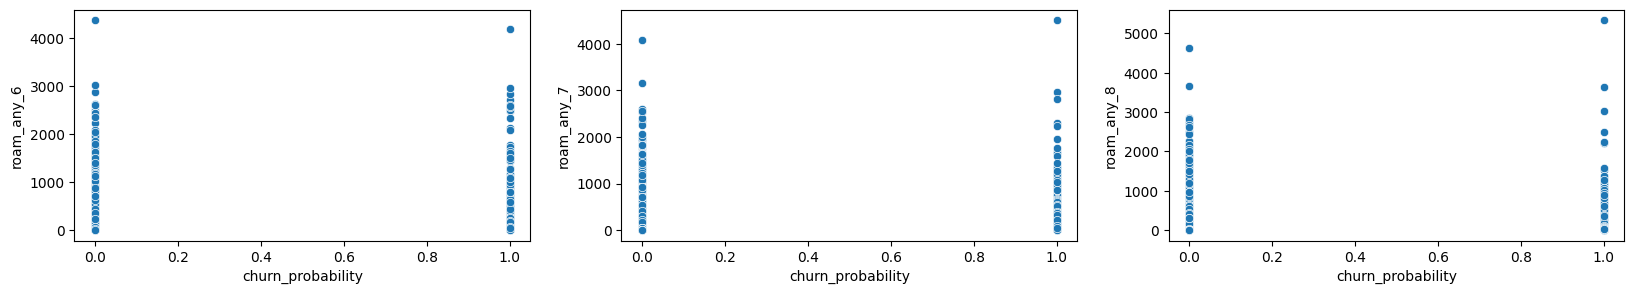

In [28]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="roam_any_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="roam_any_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="roam_any_8")
plt.show()

#### It is observed that customers who have used more raoming pack in june, are high likely to churn

In [29]:
## Add all local incoming and outgoing columns and add a new column 
telecom_dataset['local_any_6'] = telecom_dataset.loc_og_t2t_mou_6 + telecom_dataset.loc_og_t2m_mou_6 + telecom_dataset.loc_og_t2f_mou_6 + telecom_dataset.loc_og_t2c_mou_6 + telecom_dataset.loc_og_mou_6 + telecom_dataset.loc_ic_t2t_mou_6 + telecom_dataset.loc_ic_t2m_mou_6 + telecom_dataset.loc_ic_t2f_mou_6+ telecom_dataset.loc_ic_mou_6
telecom_dataset['local_any_7'] = telecom_dataset.loc_og_t2t_mou_7 + telecom_dataset.loc_og_t2m_mou_7 + telecom_dataset.loc_og_t2f_mou_7 + telecom_dataset.loc_og_t2c_mou_7 + telecom_dataset.loc_og_mou_7 + telecom_dataset.loc_ic_t2t_mou_7 + telecom_dataset.loc_ic_t2m_mou_7 + telecom_dataset.loc_ic_t2f_mou_7+ telecom_dataset.loc_ic_mou_7
telecom_dataset['local_any_8'] = telecom_dataset.loc_og_t2t_mou_8 + telecom_dataset.loc_og_t2m_mou_8 + telecom_dataset.loc_og_t2f_mou_8 + telecom_dataset.loc_og_t2c_mou_8 + telecom_dataset.loc_og_mou_8 + telecom_dataset.loc_ic_t2t_mou_8 + telecom_dataset.loc_ic_t2m_mou_8 + telecom_dataset.loc_ic_t2f_mou_8+ telecom_dataset.loc_ic_mou_8

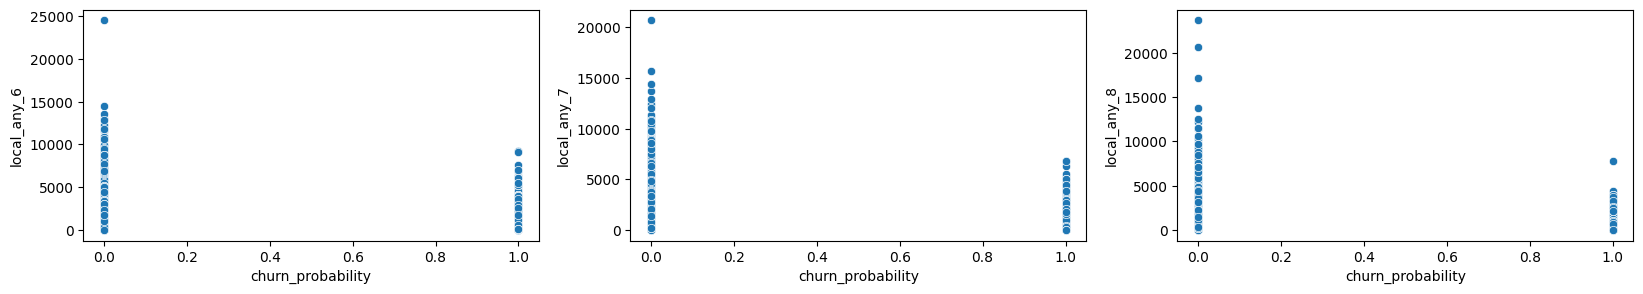

In [30]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="local_any_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="local_any_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="local_any_8")
plt.show()

#### It is observed that more customers with local usage in june and july, are highly likely to churn

In [31]:
## Add all standard incoming and outgoing columns and add a new column 
telecom_dataset['std_any_6'] = telecom_dataset.std_og_t2t_mou_6 + telecom_dataset.std_og_t2m_mou_6 + telecom_dataset.std_og_t2f_mou_6 + telecom_dataset.std_og_mou_6 + telecom_dataset.std_ic_t2t_mou_6 + telecom_dataset.std_ic_t2m_mou_6 + telecom_dataset.std_ic_t2f_mou_6 + telecom_dataset.std_ic_mou_6
telecom_dataset['std_any_7'] = telecom_dataset.std_og_t2t_mou_7 + telecom_dataset.std_og_t2m_mou_7 + telecom_dataset.std_og_t2f_mou_7 + telecom_dataset.std_og_mou_7 + telecom_dataset.std_ic_t2t_mou_7 + telecom_dataset.std_ic_t2m_mou_7 + telecom_dataset.std_ic_t2f_mou_7 + telecom_dataset.std_ic_mou_7
telecom_dataset['std_any_8'] = telecom_dataset.std_og_t2t_mou_8 + telecom_dataset.std_og_t2m_mou_8 + telecom_dataset.std_og_t2f_mou_8 + telecom_dataset.std_og_mou_8 + telecom_dataset.std_ic_t2t_mou_8 + telecom_dataset.std_ic_t2m_mou_8 + telecom_dataset.std_ic_t2f_mou_8 + telecom_dataset.std_ic_mou_8

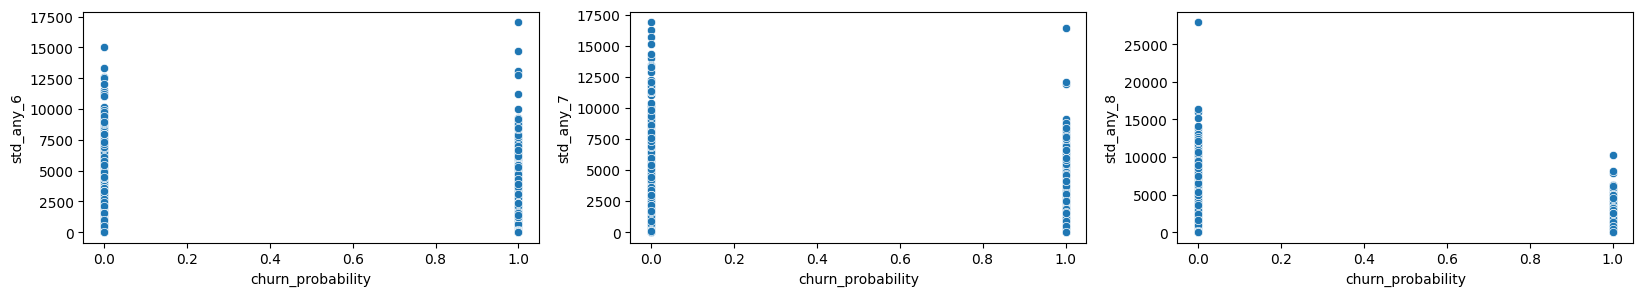

In [32]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="std_any_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="std_any_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="std_any_8")
plt.show()

#### It is observed that more customers with standard usage in june and july, are highly likely to churn

In [33]:
## Add all standard incoming and outgoing columns and add a new column 
telecom_dataset['spl_any_6'] = telecom_dataset.isd_og_mou_6 + telecom_dataset.spl_og_mou_6 + telecom_dataset.og_others_6 + telecom_dataset.spl_ic_mou_6 + telecom_dataset.isd_ic_mou_6 + telecom_dataset.ic_others_6
telecom_dataset['spl_any_7'] = telecom_dataset.isd_og_mou_7 + telecom_dataset.spl_og_mou_7 + telecom_dataset.og_others_7 + telecom_dataset.spl_ic_mou_7 + telecom_dataset.isd_ic_mou_7 + telecom_dataset.ic_others_7
telecom_dataset['spl_any_8'] = telecom_dataset.isd_og_mou_8 + telecom_dataset.spl_og_mou_8 + telecom_dataset.og_others_8 + telecom_dataset.spl_ic_mou_8 + telecom_dataset.isd_ic_mou_8 + telecom_dataset.ic_others_8

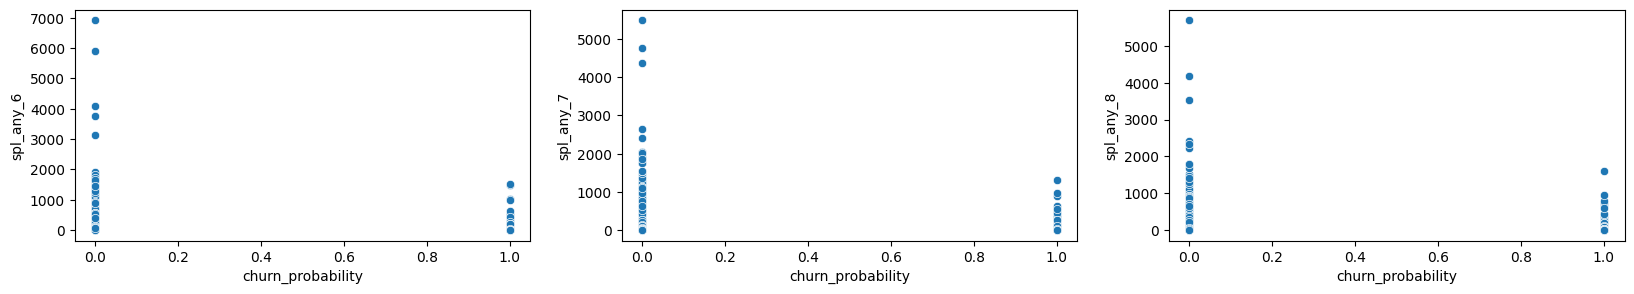

In [34]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="spl_any_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="spl_any_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="spl_any_8")
plt.show()

#### It is observed that more customers with special usage in august, are high value customers

In [35]:
## Add all data 2g and 3g columns and add a new column 
telecom_dataset['data_used_6'] = telecom_dataset.vol_2g_mb_6 + telecom_dataset.vol_3g_mb_6 + telecom_dataset.jun_vbc_3g
telecom_dataset['data_used_7'] = telecom_dataset.vol_2g_mb_7 + telecom_dataset.vol_3g_mb_7 + telecom_dataset.jul_vbc_3g
telecom_dataset['data_used_8'] = telecom_dataset.vol_2g_mb_8 + telecom_dataset.vol_3g_mb_8 + telecom_dataset.aug_vbc_3g

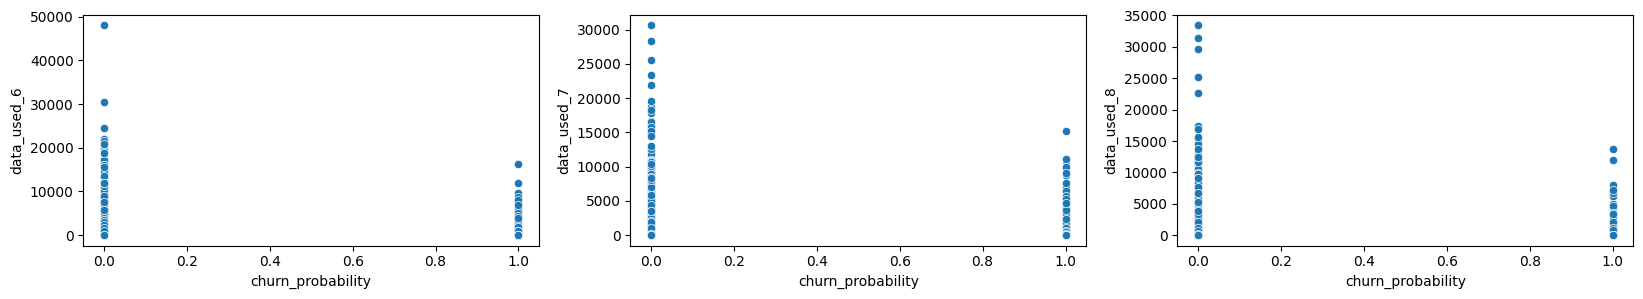

In [36]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="data_used_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="data_used_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="data_used_8")
plt.show()

#### It is observed that more customers with data usage in july, are high value customers